# Proyek Analisis Data: Air Quality Dataset
- **Nama:** Maulana Yusuf Ikhsan Robbani
- **Email:** xyzikhsanxyz@gmail.com
- **ID Dicoding:** Ikhsan Robbani

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
Bagaimana kualitas udara di Beijing?
- Pertanyaan 2
Bagaimana tren perubahan kualitas udara di Beijing tiap bulannya?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import pandas as pd               #Package untuk pemrosesan data
import numpy as np                #Package untuk perhitungan
import matplotlib.pyplot as plt   #Package untuk visualisasi data dasar
import matplotlib.dates as mdates #Package untuk menyediakan format visualisasi data deret waktu
from matplotlib import cm         #Package untuk penentuan warna peta
import seaborn as sns             #Package untuk visualisasi data lanjut
import geopandas as gpd           #Package untuk pemrosesan data geografis
import os                         #Package untuk mengatur akses file
import json                       #Package untuk mengakses file JavaScript Object Notation


In [ ]:
#Menghubungkan dengan Google Drive pribadi
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

In [ ]:
# Arsip file yang mengandung dataset
directory = '/content/drive/MyDrive/Colab Notebooks/PRSA_Data_20130301-20170228'

# Mendapatkan seluruh daftar dari directory
all_files = os.listdir(directory)

# Memilah daftar yang termasuk file CSV
csv_files = [file for file in all_files if file.endswith('.csv')]

# Membuat variabel daftar data
dataframes_list = []

# Logika perulangan untuk membaca file & menggabungkannya
for file_name in csv_files:
    # Pembuatan file baru dari directory
    file_path = os.path.join(directory, file_name)
    # Membaca seluruh file dan digabung menjadi satu dataframe
    df = pd.read_csv(file_path)
    dataframes_list.append(df)

# Menggabungkan seluruh dataframe jadi satu
combined_df = pd.concat(dataframes_list)

# Mengeluarkan index menjadi kolom
combined_df.reset_index(drop=True, inplace=True)


In [ ]:
# Penamaan ulang
combined_df.rename(columns = {'PM2.5':'PM25'}, inplace = True)

In [ ]:
#Pembuatan kolom tanggal
combined_df['date'] = pd.to_datetime(combined_df['year'].astype(str) + '-' + combined_df['month'].astype(str) +'-'+ combined_df['day'].astype(str), format='%Y-%m-%d')

Penjelasan kolom pada dataset [1]
* No \
	Penanda setiap record dalam dataset \
* year \
	Tahun saat data dikumpulkan. \
* month \
	Bulan saat data dikumpulkan. \
* day \
	tanggal saat data dikumpulkan. \
* hour \
	Jam saat data dikumpulkan \
* PM2.5 \
	Konsentrasi materi partikulat dengan diameter 2,5 mikrometer atau kurang (dalam mikrogram per meter kubik, µg/m³). PM2.5 adalah polutan kritis karena kemampuannya menembus jauh ke dalam paru-paru dan memasuki aliran darah, sehingga menimbulkan risiko kesehatan yang serius. \
* PM10 \
	Konsentrasi materi partikulat dengan diameter 10 mikrometer atau kurang (dalam µg/m³). PM10 termasuk partikel yang lebih besar dari PM2.5 dan juga dapat memengaruhi kesehatan dan jarak pandang. \
* SO2 \
	Konsentrasi sulfur dioksida (dalam µg/m³), gas yang dihasilkan oleh letusan gunung berapi dan proses industri, terutama pembakaran bahan bakar fosil. Kadar yang tinggi dapat menyebabkan masalah pernapasan dan kerusakan lingkungan. \
* NO2 \
	Konsentrasi nitrogen dioksida (dalam µg/m³), yang terutama dihasilkan dari emisi kendaraan dan proses industri. Hal ini dapat mengiritasi saluran udara dalam sistem pernapasan manusia dan berkontribusi pada pembentukan kabut asap dan hujan asam. \
* CO \
	Konsentrasi karbon monoksida (dalam µg/m³), gas yang tidak berwarna dan tidak berbau yang dihasilkan dari pembakaran bahan bakar fosil. Kadar yang tinggi dapat menyebabkan efek kesehatan yang berbahaya, terutama di ruang tertutup.  \
* O3 \
	Konsentrasi ozon di permukaan tanah (dalam µg/m³). Meskipun ozon di atmosfer bagian atas melindungi kita dari radiasi sinar UV, ozon di permukaan tanah merupakan polutan berbahaya yang dapat menyebabkan gangguan pernapasan dan gangguan kesehatan lainnya.  \
* TEMP \
	Suhu (dalam derajat Celcius) pada saat pengukuran, yang dapat memengaruhi konsentrasi polutan dan pola penyebaran. \
* PRES \
	Tekanan atmosfer (dalam hPa), yang memengaruhi pola cuaca dan dapat memengaruhi kualitas udara dengan memengaruhi cara polutan menyebar di atmosfer. \
* DEWP \
	Suhu titik embun (dalam derajat Celcius), yang menunjukkan kadar kelembapan di udara, yang dapat memengaruhi tingkat polutan dan kenyamanan manusia. \
* RAIN \
	Jumlah curah hujan (dalam mm) yang tercatat selama periode pengukuran, yang dapat membantu memahami bagaimana curah hujan memengaruhi kualitas udara dengan membersihkan polutan. \
* wd \
	Arah angin (dalam derajat), yang penting untuk memahami bagaimana polutan diangkut melalui atmosfer.  \
* WSPM \
	Kecepatan angin (dalam meter per detik), yang memengaruhi penyebaran polutan; kecepatan angin yang lebih tinggi dapat mengencerkan konsentrasi, sedangkan kecepatan yang lebih rendah dapat menyebabkan akumulasi polutan. \
* station \
	Pengenal untuk stasiun pemantauan tempat data dikumpulkan, memberikan konteks tentang variasi geografis dalam kualitas udara di berbagai lokasi. \

Indeks Kualitas Udara (Air Quality Index) [2]

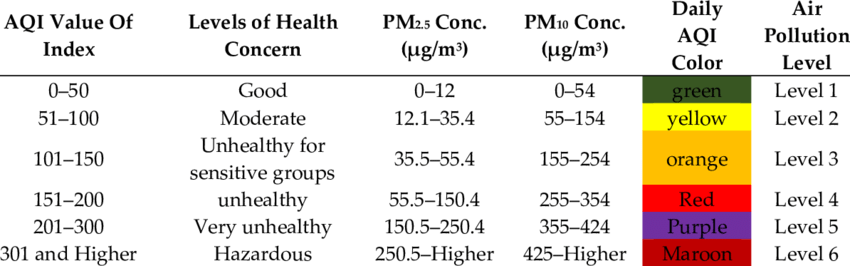


Pembuatan Longitude & Latitude (Koordinat) untuk menentukan lokasi stasiun sebagai tempat pengambilan data [1]

In [ ]:
data = {
    'station': ['Gucheng', 'Wanshouxigong', 'Tiantan', 'Guanyuan',
                'Dongsi', 'Nongzhanguan', 'Wanliu', 'Aotizhongxin',
                'Shunyi', 'Changping', 'Dingling', 'Huairou'],
    'Latitude': [39.9116, 39.8802, 39.8824, 39.9327, 39.9304, 39.9415,
                 39.9598, 39.9837, 40.1503, 40.2229, 40.2960, 40.3193],
    'Longitude': [116.1933, 116.3677, 116.4647, 116.3623, 116.4246,
                  116.4647, 116.2982, 116.3995, 116.6411, 116.2202,
                  116.2234, 116.6338]
}
# Pembuatan dataframe baru berisi koordinat tiap stasiun
station_coords = pd.DataFrame(data)

In [ ]:
#Penggabungan dataframe sstation_coords dan combined_df
combined_df = combined_df.merge(station_coords, how='left', left_on='station', right_on='station')

In [ ]:
# Membaca dataframe combined_df
combined_df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,...,PRES,DEWP,RAIN,wd,WSPM,station,date,day_of_week,Latitude,Longitude
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,...,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01,4,39.9837,116.3995
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,...,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01,4,39.9837,116.3995
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,...,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01,4,39.9837,116.3995
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,...,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01,4,39.9837,116.3995
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,...,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01,4,39.9837,116.3995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420763,35060,2017,2,28,19,11.0,32.0,3.0,24.0,400.0,...,1013.5,-16.2,0.0,NW,2.4,Wanshouxigong,2017-02-28,1,39.8802,116.3677
420764,35061,2017,2,28,20,13.0,32.0,3.0,41.0,500.0,...,1013.6,-15.1,0.0,WNW,0.9,Wanshouxigong,2017-02-28,1,39.8802,116.3677
420765,35062,2017,2,28,21,14.0,28.0,4.0,38.0,500.0,...,1014.2,-13.3,0.0,NW,1.1,Wanshouxigong,2017-02-28,1,39.8802,116.3677
420766,35063,2017,2,28,22,12.0,23.0,4.0,30.0,400.0,...,1014.4,-12.9,0.0,NNW,1.2,Wanshouxigong,2017-02-28,1,39.8802,116.3677


**Insight:**
- Pengambilan data tingkat polusi dilakukan di stasiun-stasiun kota Beijing
- Metrik yang terdapat pada data diantaranya 'PM2.5',	'PM10',	'SO2',	'NO2',	'CO',	'O3',	'TEMP',	'PRES',	'DEWP',	'RAIN',	'WSPM'

### Assessing Data

Pengecekan nilai kosong dalam data

In [ ]:
combined_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,8739
PM10,6449
SO2,9021
NO2,12116
CO,20701


Pengecekan apakah record data tidak berganda

In [ ]:
combined_df.duplicated().sum()

0

In [ ]:
#Pembuatan kolom numerik & kategorik dataframe combined_df
numerik = ['No',	'year',	'month',	'day', 'hour',	'PM2.5',	'PM10',	'SO2',	'NO2',	'CO',	'O3',	'TEMP',	'PRES',	'DEWP',	'RAIN',	'WSPM']
kategorik = ['wd','station']

In [ ]:
# Pendefinisian kuartil 1 (q25) dan kuartil 3
q25, q75 = np.percentile(combined_df[numerik], 25), np.percentile(combined_df[numerik], 75)
# Pendefinisian interkuartil
iqr = q75 - q25
cut_off = iqr * 1.5
# Pendefinisian batas minimum dan maksimum tanpa outlier dari data
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers = [x for x in combined_df[numerik] if x < minimum or x > maximum]
outliers

**Insight:**
- Data memiliki banyak nilai ekstrim sehingga mengganggu proses analisis data
- Ditemukan nilai kosong didominasi kolom NO2, CO, O3, dan wd (arah angin)

### Cleaning Data

1. Mengatasi nilai yang kosong dengan interpolasi\
Interpolasi digunakan karena perubahan nilai pada data menunjukan tren dan pola

In [ ]:
# Mengisi nilai nan dengan metode interpolasi
combined_df = combined_df.interpolate()

<ipython-input-19-5ae03cf769d0>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  combined_df = combined_df.interpolate()


In [ ]:
# Mengecek kembali nilai kosong pada data
combined_df.isnull().sum()

,0
No,0
year,0
month,0
day,0
hour,0
PM2.5,0
PM10,0
SO2,0
NO2,0
CO,0


2. Mengatasi *outlier* dengan metode interkuartil \
Outlier dalam beberapa kasus baik dihilangkan agar tidak menggangu generalisasi data

In [ ]:
# Membuat tabel statistika dari data combined_df
tabel_stat = combined_df[numerik].describe(include="all")

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.839718,104.910268,15.913090,50.600220,1235.682649,57.237872,13.531692,1010.753337,2.482421,0.064428,1.730034
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.950217,92.431422,21.896609,35.170876,1161.790893,57.135195,11.437867,10.474302,13.797675,0.820638,1.246674
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [ ]:
# Mendefinisikan interquartil (IQR), batas bawah, dan batas atas
tabel_stat.loc['IQR'] = tabel_stat.loc['75%']-tabel_stat.loc['25%']
tabel_stat.loc['Batas_Bawah'] = tabel_stat.loc['25%'] - (1.5 * tabel_stat.loc['IQR'])
tabel_stat.loc['Batas_Atas'] = tabel_stat.loc['75%'] + (1.5 * tabel_stat.loc['IQR'])

In [ ]:
# Menjadikan nilai outlier menjadi nan (tak terdefinisi)
for x in numerik:
  for i in range(len(combined_df)):
    if combined_df[x].loc[i]<tabel_stat[x].loc['Batas_Bawah']:
      combined_df[x].loc[i]=np.nan
    elif combined_df[x].loc[i]>tabel_stat[x].loc['Batas_Atas']:
      combined_df[x].loc[i] = np.nan

In [ ]:
# Melakukan interpolasi kembali setelah mengosongkan nilai outlier
combined_df = combined_df.interpolate()

<ipython-input-25-5ae03cf769d0>:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  combined_df = combined_df.interpolate()


**Insight:**
- Fitur built-in dari Python, interpolate() mampu untuk mengisi nilai-nilai kosong atau mengganti nilai outlier

## Exploratory Data Analysis (EDA)

### Explorasi data secara umum

In [ ]:
# Menampilkan tabel statistika
tabel_stat

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.839718,104.910268,15.913090,50.600220,1235.682649,57.237872,13.531692,1010.753337,2.482421,0.064428,1.730034
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.950217,92.431422,21.896609,35.170876,1161.790893,57.135195,11.437867,10.474302,13.797675,0.820638,1.246674
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,10.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,44.000000,14.500000,1010.400000,3.000000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000
IQR,17531.500000,2.000000,6.000000,15.000000,11.500000,91.000000,109.000000,17.000000,48.000000,1000.000000,72.000000,20.200000,16.700000,24.000000,0.000000,1.300000
Batas_Bawah,-17530.500000,2011.000000,-5.000000,-14.500000,-11.500000,-116.500000,-127.500000,-22.500000,-49.000000,-1000.000000,-98.000000,-27.200000,977.250000,-44.900000,0.000000,-1.050000


In [ ]:
# Menampilkan tabel statistika khusus kolom kategorik
combined_df[kategorik].describe()

,wd,station
count,418946,420768
unique,16,12
top,NE,Aotizhongxin
freq,43335,35064


In [ ]:
# EDA Menggunakan Boxplot untuk mengetahui keberadaan outlier
def boxplot(data):
  plt.figure(figsize=(18,10))
  for i in range(0, len(numerik)):
    plt.subplot(3, 6, i+1)
    sns.boxplot(y = data[numerik[i]], color='green', orient='v')
    plt.tight_layout()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.

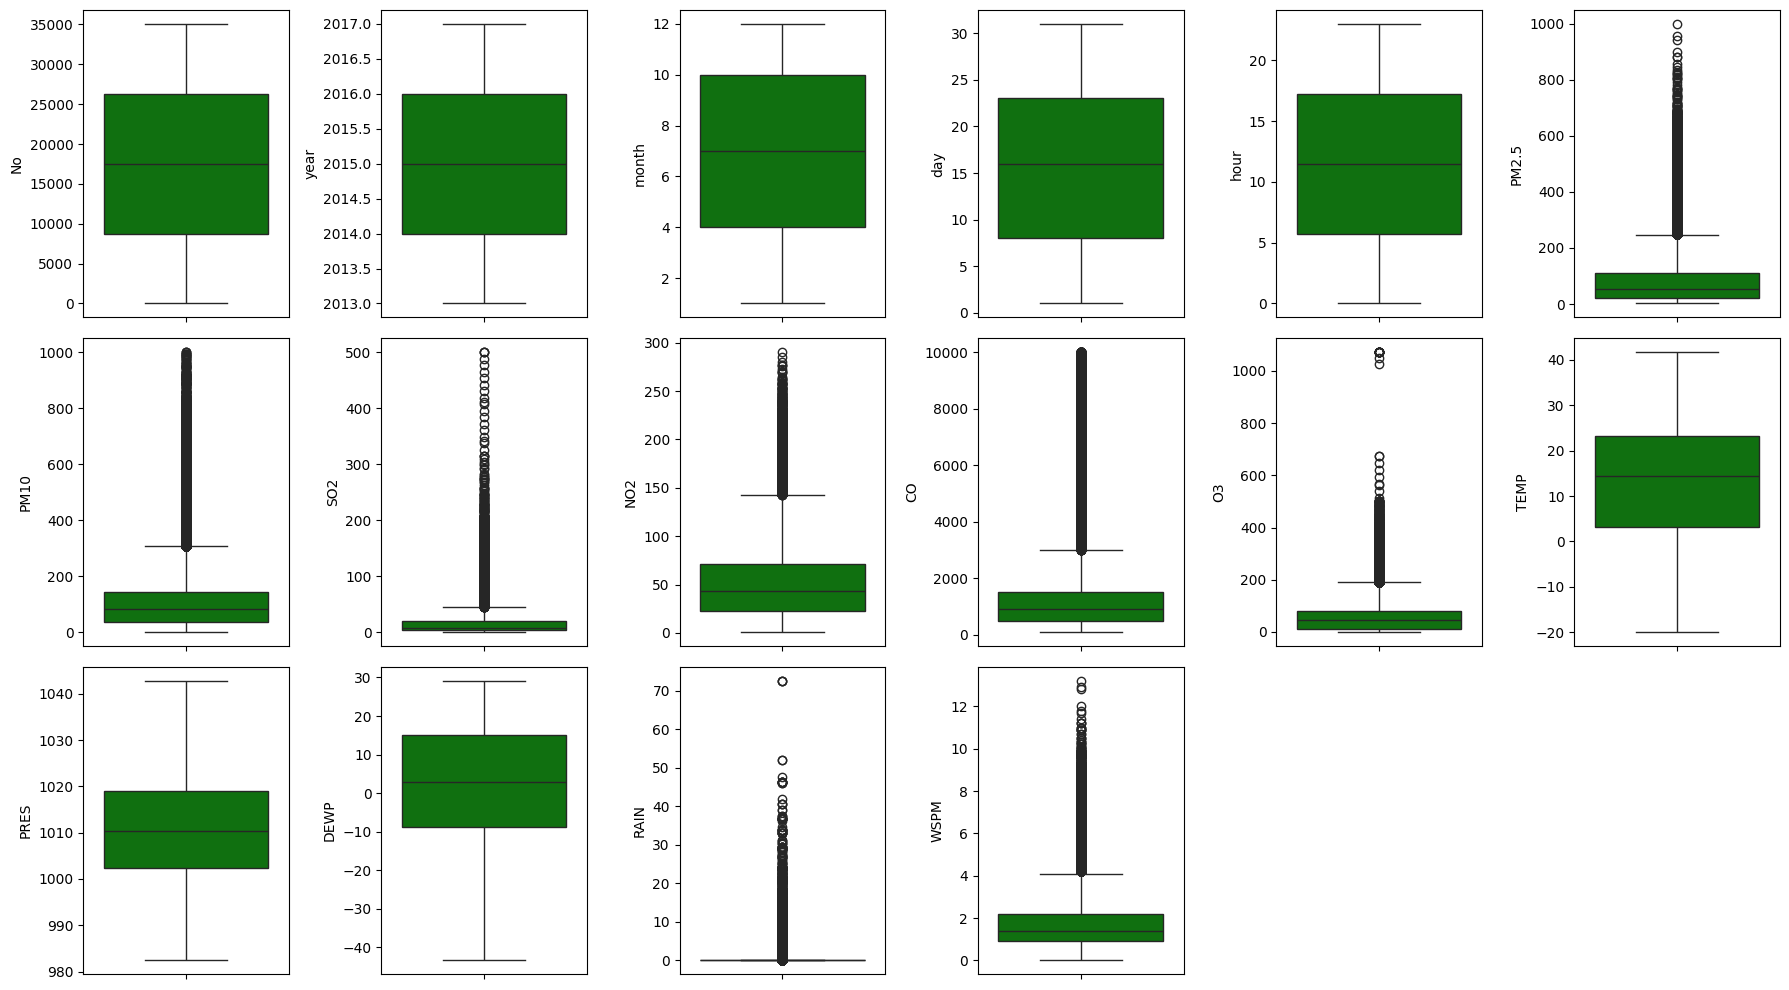

In [ ]:
# Memanggil method boxplot
boxplot(combined_df)

In [ ]:
# EDA Menggunakan Histogram dan KDE plot
def histogram(data):
  plt.figure(figsize=(18, 10))
  for i in range(0, len(numerik)):
      plt.subplot(3, 5, i+1)
      sns.distplot(data[numerik[i]], color='green', label=i)
      plt.tight_layout()

In [ ]:
# Memanggil method histogram
histogram(combined_df)

In [ ]:
# Membuat method pembuatan tabel agregasi berdasarkan kebutuhan
def group_by_method(stat_metric,keycol):
 return combined_df.groupby(keycol).agg(
    PM25 = ('PM25', stat_metric),
    PM10 = ('PM10', stat_metric),
    SO2 = ('SO2', stat_metric),
    NO2 = ('NO2',stat_metric),
    CO = ('CO',stat_metric),
    O3 = ('O3',stat_metric),
    TEMP = ('TEMP',stat_metric),
    PRES = ('PRES',stat_metric),
    DEWP = ('DEWP',stat_metric),
    RAIN = ('RAIN',stat_metric),
    WSPM = ('WSPM',stat_metric)
)

In [ ]:
# Pembuatan tabel agregasi berdasarkan tanggal per hari
city_gr_mean_day = group_by_method('mean',['date','station','Longitude','Latitude'])
# Pembuatan tabel agregasi berdasarkan bulan
city_gr_mean_month = group_by_method('mean',['month','year','station','Longitude','Latitude'])
# Pembuatan tabel agregasi berdasarkan stasiun
city_gr_mean_tot = group_by_method('mean',['station','Longitude','Latitude'])

In [ ]:
# Mengeluarkan kolom yang menjadi index menjadi kolom biasa
city_gr_mean_day.reset_index(inplace=True)
city_gr_mean_day.set_index('date', inplace=True)
city_gr_mean_month.reset_index(inplace=True)
city_gr_mean_month['date'] = pd.to_datetime(city_gr_mean_month['year'].astype(str) + '-' + city_gr_mean_month['month'].astype(str) +'-1', format='%Y-%m-%d')
city_gr_mean_tot.reset_index(inplace=True)

In [ ]:
city_gr_mean_month.head()

station  Longitude  Latitude        PM25        PM10  \
month year                                                              
1     2014  Aotizhongxin   116.3995   39.9837   95.379032  125.418683   
      2014     Changping   116.2202   40.2229   88.147177  110.272177   
      2014      Dingling   116.2234   40.2960   73.084005  100.424059   
      2014        Dongsi   116.4246   39.9304  104.137769  112.143145   
      2014      Guanyuan   116.3623   39.9327  100.872312  132.567204   

                  SO2        NO2           CO      TEMP         PRES  \
month year                                                             
1     2014  58.357527  66.719758  1863.306452 -0.138306  1020.051344   
      2014  57.946909  56.318548  2293.615591 -0.011022  1016.718683   
      2014  37.049731  38.662634  1183.064516 -0.011022  1016.718683   
      2014  56.687500  49.188394  1876.478495 -0.205914  1021.909005   
      2014  55.676747  74.751344  1949.596774 -0.138306  1020.051344   

                 DEWP  RAIN      WSPM  
month year                             
1     2014 -12.156989   0.0  1.747446  
      2014 -15.100269   0.0  1.891263  
      2014 -15.100269   0.0  1.891263  
      2014 -13.101210   0.0  1.774731  
      2014 -12.156989   0.0  1.747446

**Insight:**
- Berdasarkan tabel statistika, nilai pada data tersebut memiliki rentang yang normal, sesuai dengan logika sehari-hari. Contoh temperature (TEMP) tidak ditemukan suhu dibawah -20, rentang hari dari 1 sampai 31, rentang bulan dari 1-12 dst
- Nilai curah hujan (RAIN) sangatlah ekstrim. Bahkan setelah dihapus outliernya tetap rentangnya 0 - 72.5. Padahal 75% data berada pada 0. Artinya kota Beijing jarang terjadi hujan

## Visualization & Explanatory Analysis

### Pertanyaan 1:

Bagaimana kualitas udara di distrik Beijing, RRC?

In [ ]:
# Pendefinisian data beijing sebagai data geopandas dari city_gr_mean_tot
beijing = gpd.GeoDataFrame(city_gr_mean_tot)

,station,Longitude,Latitude,PM25,PM10,SO2,NO2,CO,TEMP,PRES,DEWP,RAIN,WSPM,geometry,index_right,block_id
0,Aotizhongxin,116.3995,39.9837,82.540623,110.210033,17.459251,59.074106,1264.692405,13.581414,1011.851650,3.120296,0.067383,1.708577,POINT (116.3995 39.9837),3627.0,3627.0
1,Changping,116.2202,40.2229,70.986438,94.788575,14.943066,44.206153,1156.990246,13.671605,1007.771151,1.486924,0.060293,1.854871,POINT (116.2202 40.2229),NaN,NaN
2,Dingling,116.2234,40.2960,66.845557,84.113713,11.797849,27.304331,925.111838,13.671605,1007.771151,1.486924,0.060293,1.854871,POINT (116.2234 40.296),NaN,NaN


In [ ]:
beijing.describe()

,Longitude,Latitude,PM25,PM10,SO2,NO2,CO,TEMP,PRES,DEWP,RAIN,WSPM,index_right,block_id,CO_normalized,CO_quadratic
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,8.000000,8.000000,12.000000,1.200000e+01
mean,116.391125,40.034233,79.839718,104.910268,15.913090,50.600220,1235.682649,13.531692,1010.753337,2.482421,0.064428,1.730034,2652.250000,2652.250000,116.810922,1.544650e+06
std,0.147677,0.164718,6.751092,10.091236,2.457326,11.483417,139.107311,0.371209,2.121897,0.567663,0.002873,0.164374,748.194541,748.194541,31.229767,3.219777e+05
min,116.193300,39.880200,66.845557,84.113713,11.797849,27.304331,925.111838,12.430556,1007.612315,1.486924,0.060293,1.343667,1597.000000,1597.000000,50.000000,8.558319e+05
25%,116.279500,39.925700,77.325081,98.151095,14.244006,44.178289,1187.676057,13.542509,1008.569557,2.388535,0.063240,1.694626,2168.000000,2168.000000,103.836906,1.410888e+06
50%,116.383600,39.950650,82.719072,109.378186,16.534587,54.724240,1285.012834,13.668250,1011.683927,2.447974,0.064134,1.776617,2810.500000,2810.500000,127.191274,1.651671e+06
75%,116.464700,40.168450,84.322988,110.437678,17.809363,58.106114,1329.549146,13.671605,1012.551871,2.809236,0.067383,1.856357,3114.250000,3114.250000,138.445622,1.767703e+06
max,116.641100,40.319300,86.144243,119.261567,18.760102,65.668418,1373.618569,13.855824,1013.071937,3.263752,0.068224,1.860815,3627.000000,3627.000000,150.000000,1.886828e+06


In [ ]:
# Memunculkan Beijing GeoJSON
# Sumber file GeoJSON: https://github.com/echarts-maps/echarts-china-cities-js/blob/master/geojson/shape-only/beijing.geojson
beijing_boundary = gpd.read_file('/content/drive/MyDrive/Colab Notebooks/beijing.geojson')

In [ ]:
def plot_air_quality_map(data, indicator, color_map='plasma', x_limits=(116.10, 116.70), y_limits=(39.80, 40.40), title="Air Quality Levels in Beijing"):
    """
    Plot peta kota Beijing beserta dengan kualitas udara berdasarkan indikator tertentu.
    Parameters:
    - data: DataFrame yang mengandung data stasiun.
    - indicator: Indikator kualitas udara (contoh, 'CO', 'PM25', 'PM10', dll.).
    - color_map: Warna peta.
    - x_limits: Skala peta (longitude).
    - y_limits: Skala peta (latitude).
    """

    # Membuat plot
    fig, ax = plt.subplots(figsize=(10, 10))
    beijing_boundary.plot(ax=ax, color='lightblue', edgecolor='black')

    # Membuat warna peta
    cmap = cm.get_cmap(color_map)

    # Plot tiap stasiun berdasarkan indikator dan tingkat polusi
    scatter = ax.scatter(
        data['Longitude'], data['Latitude'],
        c=data[indicator],  # Indikator
        cmap=cmap,  # Penerapan Warna Peta
        s=100,  # Ukuran poin data
        edgecolor='black',
        alpha=0.8
    )

    # Pengaturan teks demi keterbacaan
    for x, y, label in zip(data['Longitude'], data['Latitude'], data['station']):
        plt.text(x + 0.002, y + 0.002, label, fontsize=9, ha='left')

    # Menambahkan colorbar sebagai metrik
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label(indicator + ' Levels')

    # Penyesuaian ukuran peta
    ax.set_xlim(x_limits)
    ax.set_ylim(y_limits)

    # Penambahan judul dan label tiap sumbu
    plt.title(title)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")

    # Menunjukan plot
    plt.show()



<ipython-input-137-5a5777e3fa50>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(color_map)


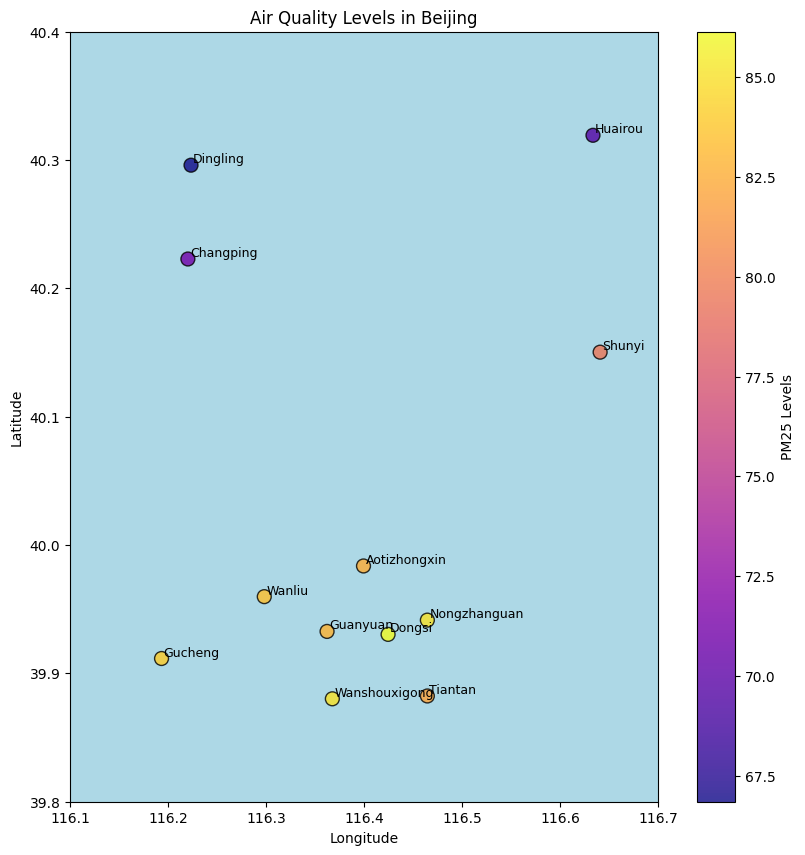

<ipython-input-137-5a5777e3fa50>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(color_map)


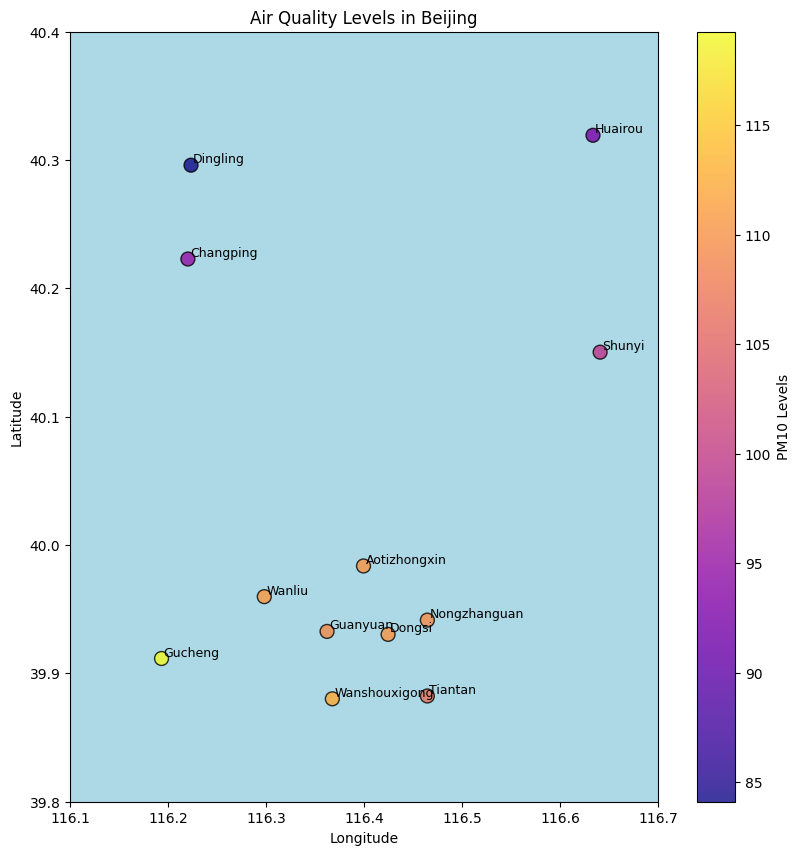

<ipython-input-137-5a5777e3fa50>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(color_map)


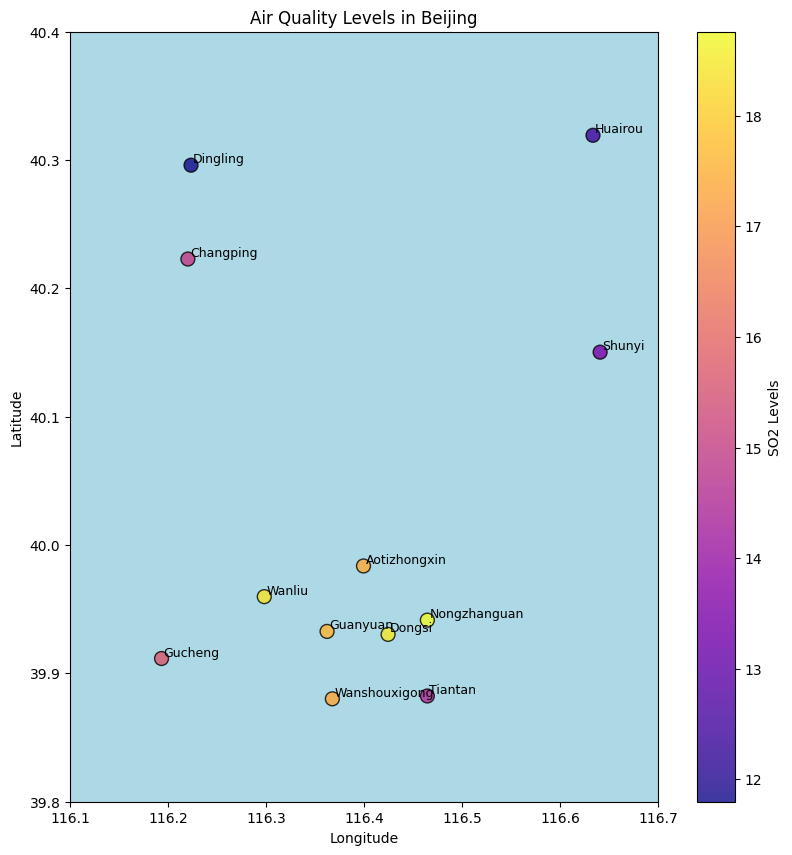

<ipython-input-137-5a5777e3fa50>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(color_map)


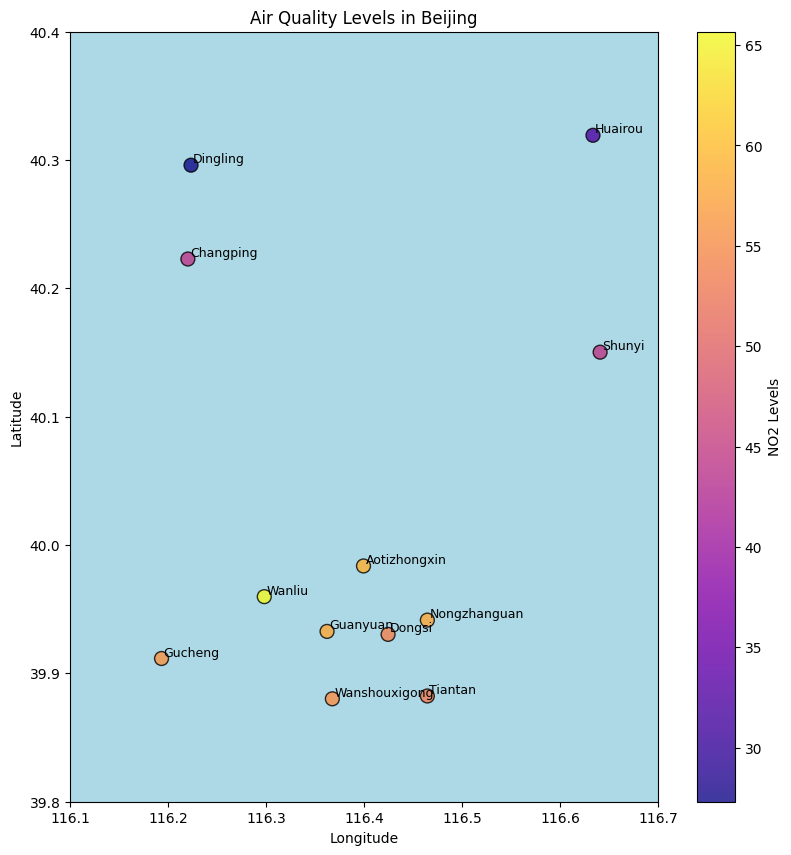

<ipython-input-137-5a5777e3fa50>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(color_map)


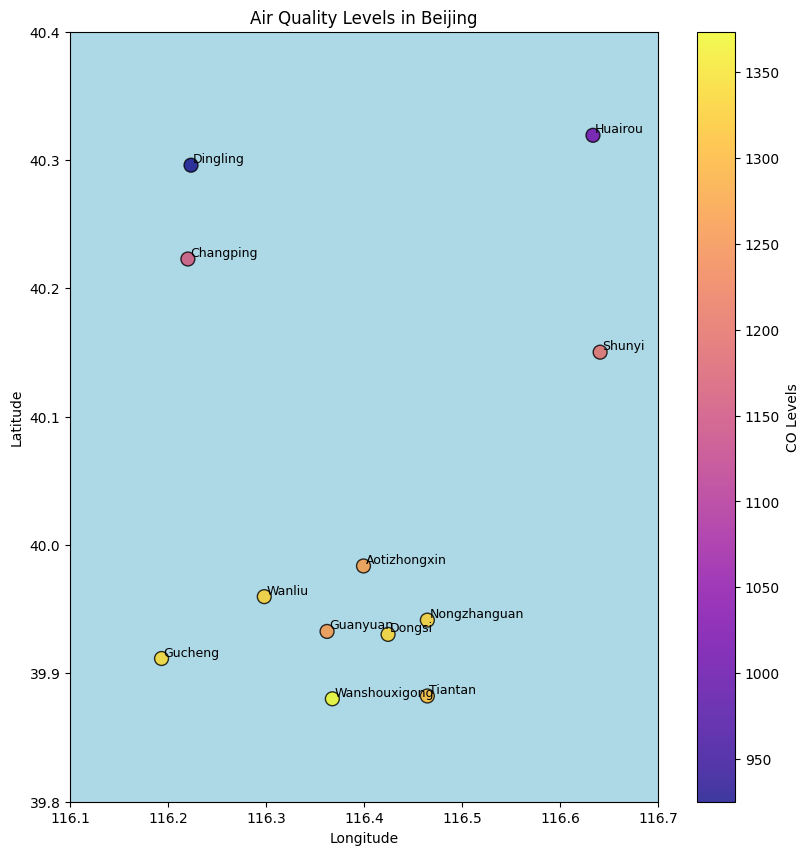

<ipython-input-137-5a5777e3fa50>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(color_map)


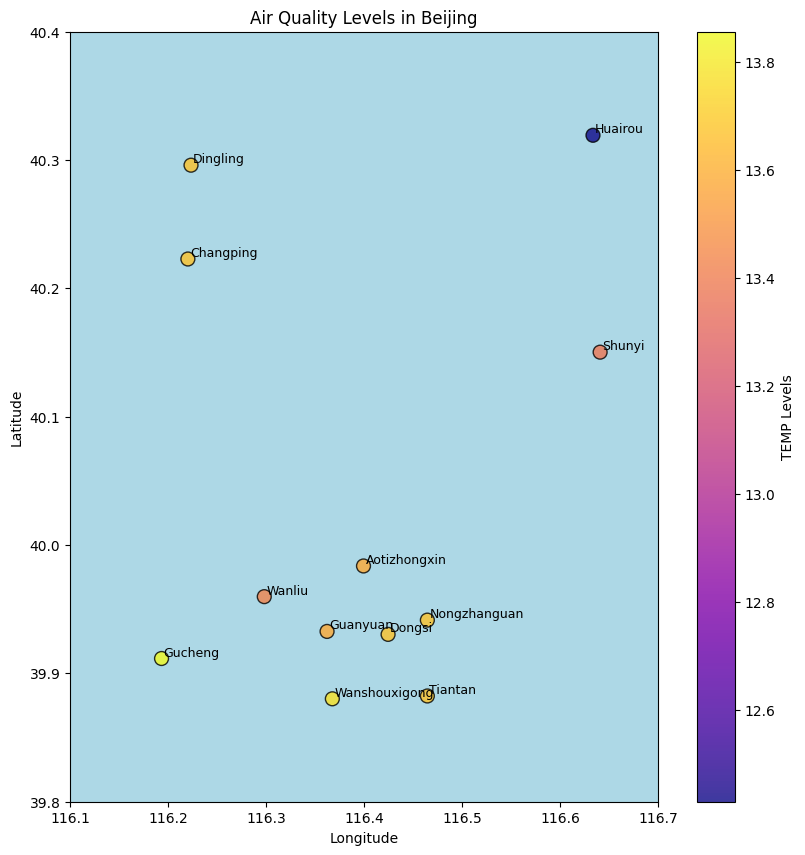

<ipython-input-137-5a5777e3fa50>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(color_map)


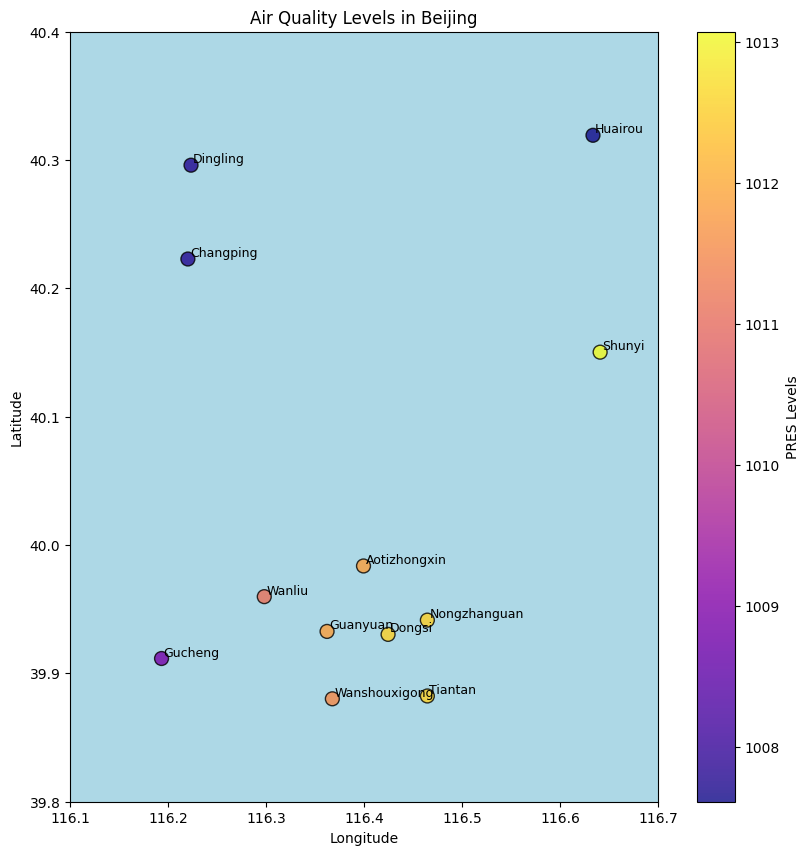

<ipython-input-137-5a5777e3fa50>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(color_map)


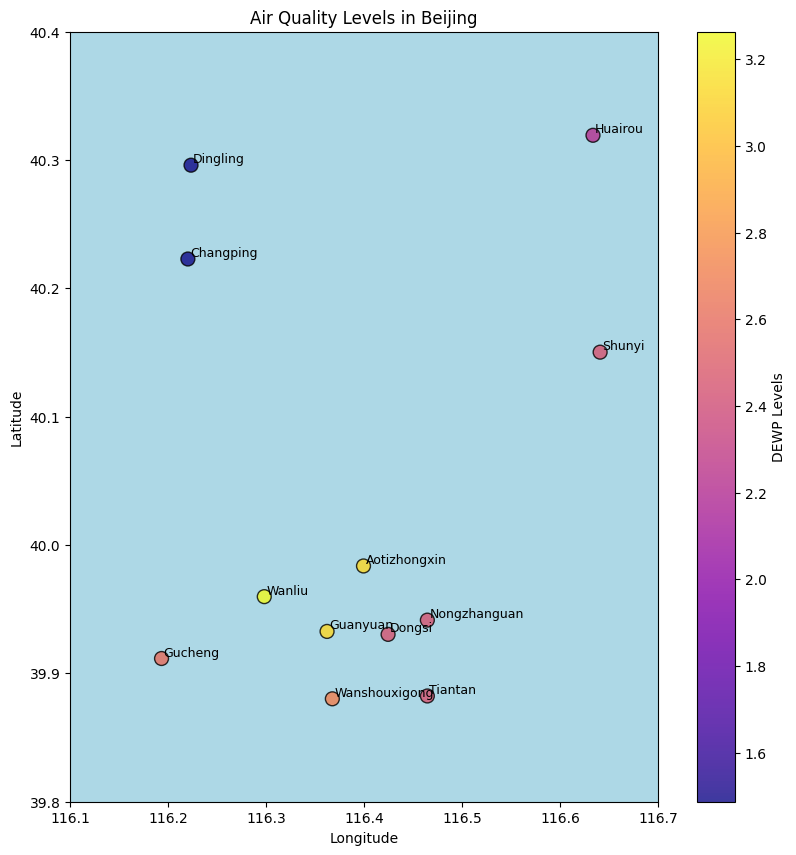

<ipython-input-137-5a5777e3fa50>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(color_map)


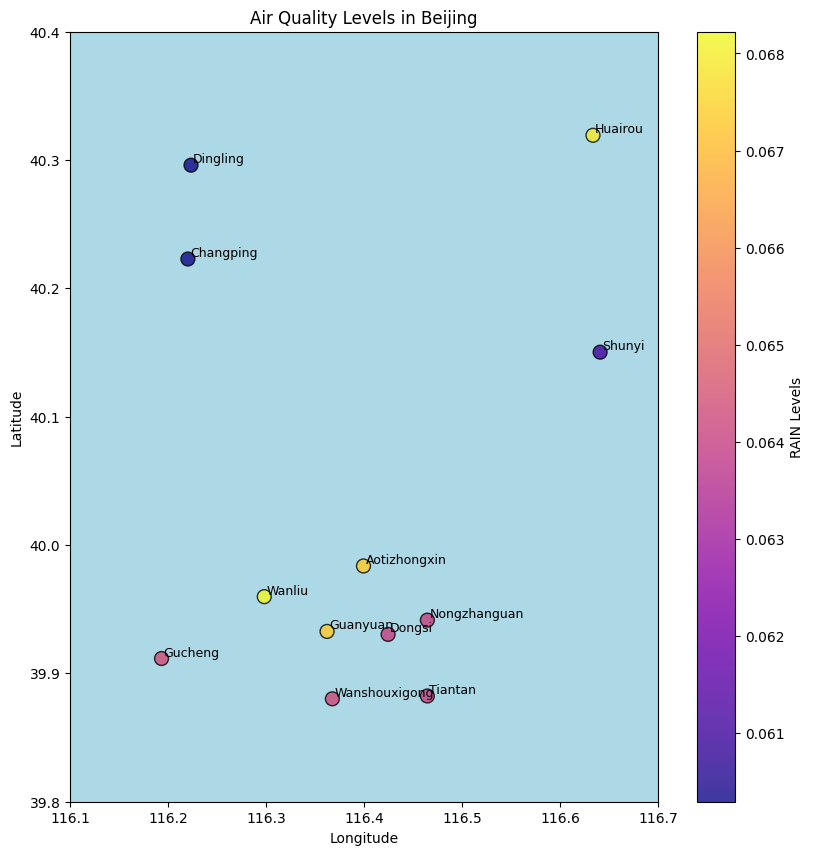

<ipython-input-137-5a5777e3fa50>:19: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap(color_map)


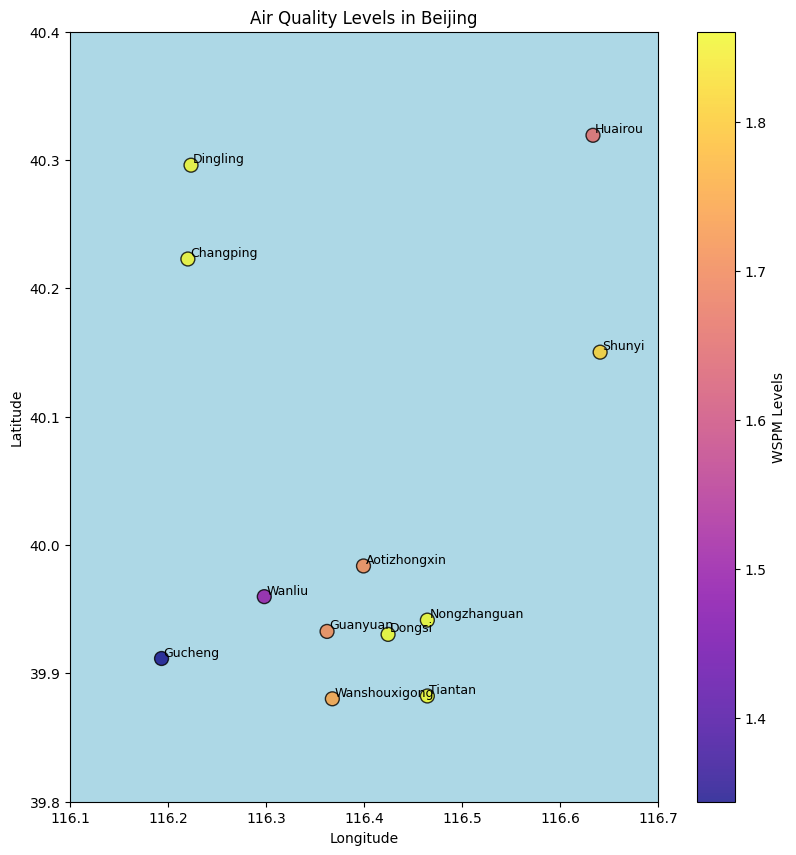

In [ ]:
# Perulangan untuk mencetak plot
kolom_penting = ['PM25',	'PM10']
for i in kolom_penting:
  plot_air_quality_map(beijing, indicator=i, color_map='plasma')

### Pertanyaan 2:

Bagaimana tren perubahan kualitas udara di distrik Beijing, RRC tiap bulannya?

In [ ]:
# Daftar nama stasiun
beijing.station.unique()

array(['Wanshouxigong', 'Gucheng', 'Dongsi', 'Wanliu', 'Nongzhanguan',
       'Tiantan', 'Aotizhongxin', 'Guanyuan', 'Shunyi', 'Changping',
       'Huairou', 'Dingling'], dtype=object)

In [ ]:
# Method untuk mencetak tren polusi
def plot_time_series(indicator, daftar_stasiun):
  """
    Plot tren kota Beijing beserta dengan kualitas udara berdasarkan indikator tertentu.
    Parameters:
    - data: DataFrame yang mengandung data stasiun.
    - indicator: Indikator kualitas udara (contoh, 'CO', 'PM25', 'PM10', dll.).
    - daftar_stasiun: daftar stasiun yang ingin dilihat.
    - x_limits: Skala peta (longitude).
    - y_limits: Skala peta (latitude).
    """
  timeseries = data[data['station'].isin(daftar_stasiun)]
  plt.figure(figsize=(18, 6))
  ax = sns.lineplot(x='date', y=indicator, data=timeseries, hue='station')
  ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
  ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))
  plt.xlabel('Tanggal')
  plt.ylabel('Jumlah')
  plt.xticks(rotation=25, ha='right', fontsize=10)
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
  plt.title('Tren kadar PM25 ditiap stasiun')
  plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


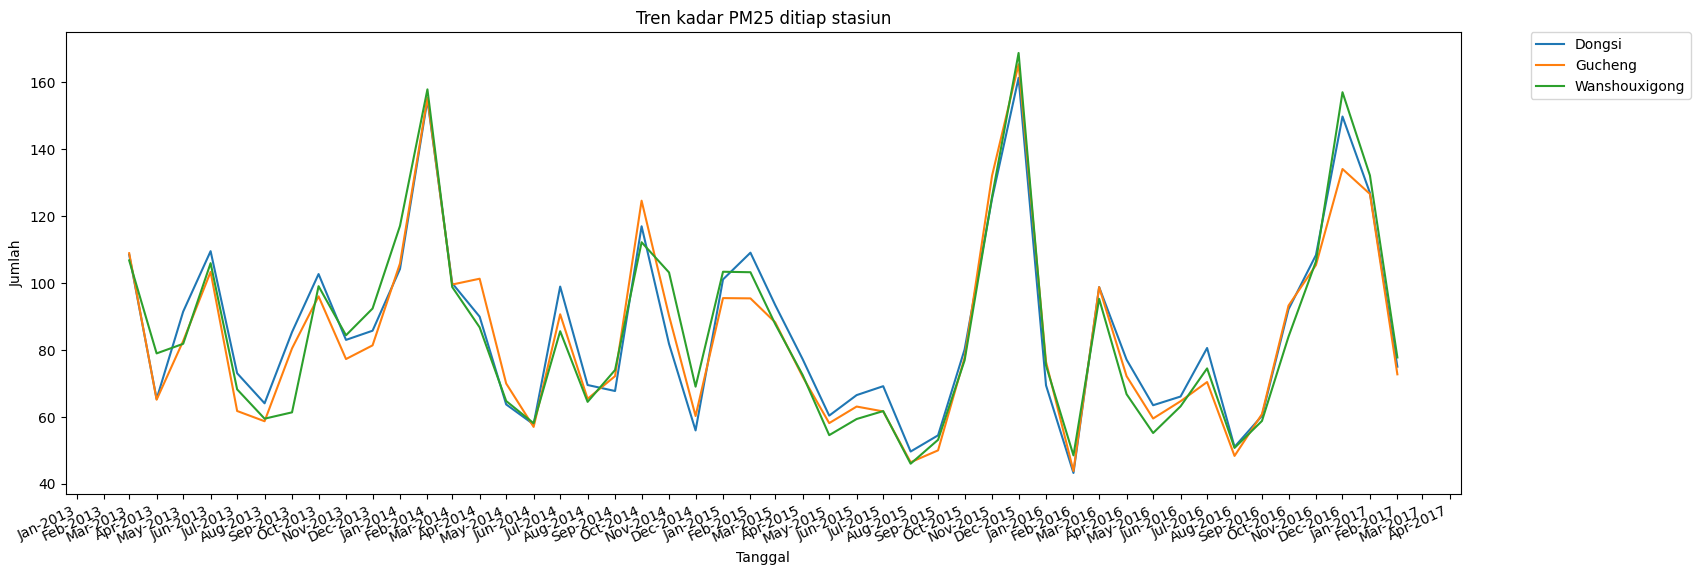

In [ ]:
plot_time_series(data=city_gr_mean_month,indicator='PM25',daftar_stasiun = ['Wanshouxigong', 'Gucheng', 'Dongsi', 'Wanliu', 'Nongzhanguan',
       'Tiantan', 'Aotizhongxin', 'Guanyuan', 'Shunyi', 'Changping',
       'Huairou', 'Dingling'])

In [ ]:
plot_time_series(data=city_gr_mean_month,indicator='PM10',daftar_stasiun = ['Wanshouxigong', 'Gucheng', 'Dongsi', 'Wanliu', 'Nongzhanguan',
       'Tiantan', 'Aotizhongxin', 'Guanyuan', 'Shunyi', 'Changping',
       'Huairou', 'Dingling'])

**Insight:**
- Daerah utara yang jauh dari pusat kota cenderung memiliki kadar polutan yang rendah dibanding daerah selatan
- Jika berpacu pada metrik PM 2.5 maka seluruh stasiun itu berada pada level 4 yang artinya udara disana berbahaya
- Jika berpacu pada metrik PM 10 maka seluruh stasiun itu berada pada level 2 yang artinya udara disana cukup berbahaya
- Tren kenaikan dan penurunan kadar polutan di seluruh stasiun cenderung sama dan memiliki pola musiman berdasarkan bulannya
- Ketika mendekati akhir tahun, kadar polutan semakin meningkat drastis

## Analisis Lanjutan (Opsional)

<Axes: >

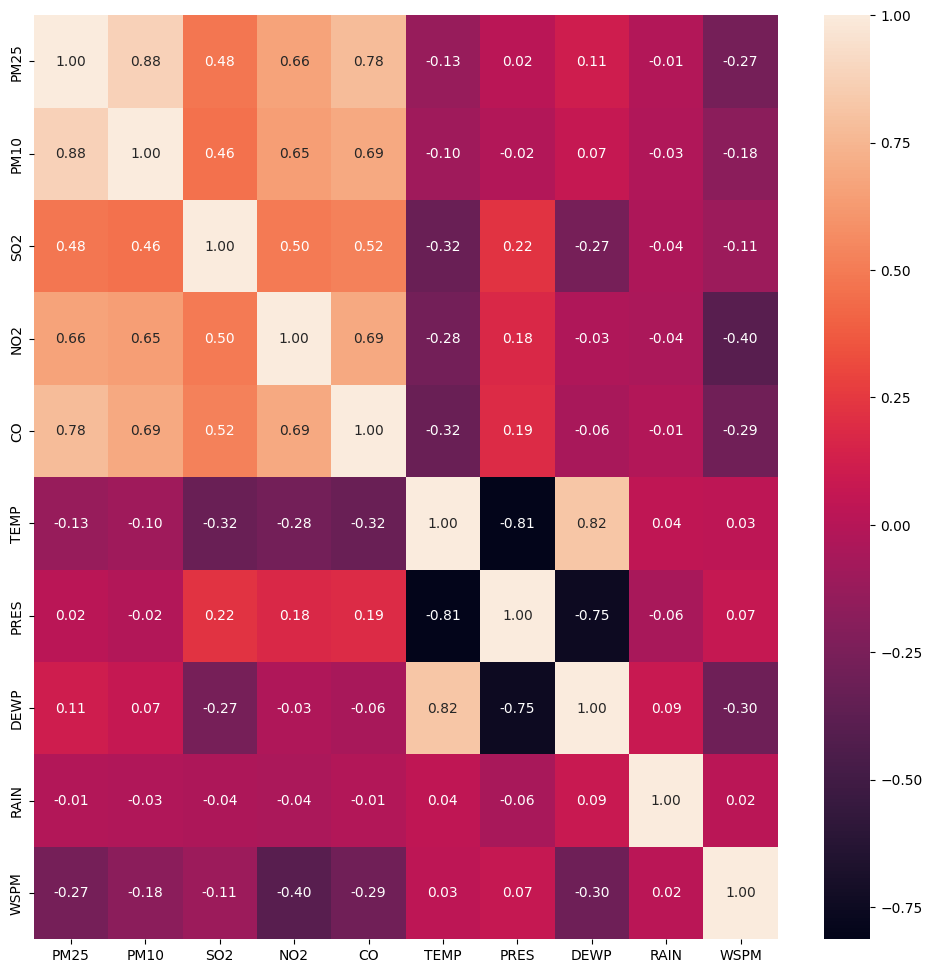

In [ ]:
# Peta korelasi antar kolom/variabel
kolom_penting = ['PM25',	'PM10',	'SO2',	'NO2',	'CO', 'O3' 'TEMP',	'PRES',	'DEWP',	'RAIN',	'WSPM']
plt.figure(figsize=(12,12))
correlation = combined_df[kolom_penting].corr()
sns.heatmap(correlation, annot=True, fmt=".2f")

## Conclusion

- Berdasarkan data keseluruhan, sebagian besar stasiun di Beijing memiliki kualitas udara yang tidak sehat
- Kadar polutan di tiap stasiun mengikuti tren berdasarkan bulan

Sumber: \
[1] Air Quality Levels and Health Risk Assessment of Particulate Matters in Abuja Municipal Area, Nigeria \
Nathaniel Wambebe, Xiaoli Duan \
Agustus 2020 \
 \
[2] A hybrid prediction model of air quality for sparse station based on spatio-temporal feature extraction \
Yue Hu, Xiaoxia Chen, Hanzhong Xia \
Juni 2023